In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings

warnings.filterwarnings('ignore')

/kaggle/input/task1-dataset/data.csv


In [4]:
fifa_df=pd.read_csv("/kaggle/input/task1-dataset/data.csv")
fifa_df


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


In [5]:
fifa_df.describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,...,18944.000000,18944.000000,0.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,226242.402872,25.225823,181.190773,75.016892,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,...,48.050412,57.978674,NaN,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,27171.091056,4.697354,6.825672,7.057140,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,...,15.671721,12.118390,NaN,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,41.000000,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,...,6.000000,12.000000,NaN,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210030.500000,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,...,38.750000,50.000000,NaN,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,232314.500000,25.000000,181.000000,75.000000,1.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,...,49.000000,59.000000,NaN,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,246760.250000,29.000000,186.000000,80.000000,1.000000,70.000000,75.000000,1.800000e+06,7000.000000,1.000000,...,60.000000,66.000000,NaN,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,258970.000000,53.000000,206.000000,110.000000,4.000000,93.000000,95.000000,1.055000e+08,560000.000000,5.000000,...,92.000000,96.000000,NaN,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


In [6]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB


In [7]:
fifa_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


**first we start with checking for the missing values if any**

In [8]:
fifa_df=fifa_df.drop(columns=['defending_marking'],axis=1)

In [9]:
fifa_df.isnull().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 105, dtype: int64

let's also check for missing values by visualizing 

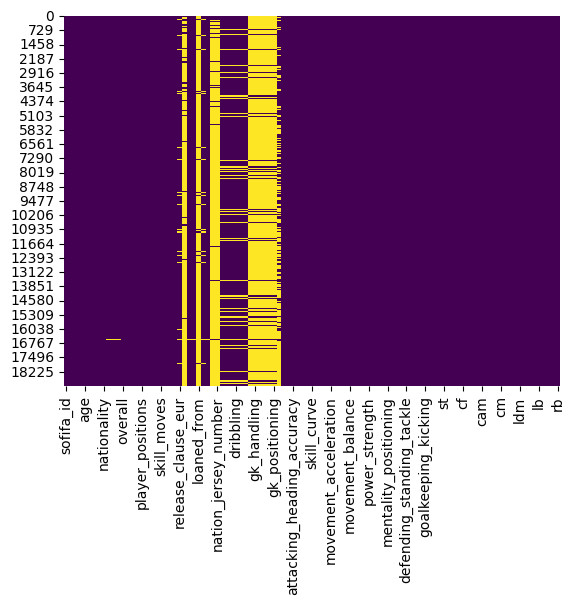

In [10]:
#isualizing missing values
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
sns.heatmap(fifa_df.isnull(), cbar=False, cmap='viridis')
plt.show()

so from the above heatmap.... We can interpret the following:
* The x-axis represents the columns (features) of the dataset.
* The y-axis represents the rows (individual records or observations).
* in this viridis colormap.. Yellow represents the missing values(NAN values) and whereas the purple shade represents the non missing values
* we can see that quite a few featues such as gk_handling etc have a lot of missing values... suggesting that data collection or entry processes need to be reviewed.
* Let's check one of these features

In [11]:
fifa_df['gk_handling'].isnull().sum()

16861

TO handle the missing values.. we first make two dataframes.. one for the numericsl columns and another one for categorical columns...

In [12]:
numerical_columns = fifa_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = fifa_df.select_dtypes(include=['object']).columns\
# Create DataFrame for numerical and categorical columns
df_numerical = fifa_df[numerical_columns]

df_categorical = fifa_df[categorical_columns]

In [13]:
df_categorical

,player_url,short_name,long_name,dob,nationality,club_name,league_name,player_positions,preferred_foot,work_rate,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,Argentina,FC Barcelona,Spain Primera Division,"RW, ST, CF",Left,Medium/Low,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,Portugal,Juventus,Italian Serie A,"ST, LW",Right,High/Low,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,1993-01-07,Slovenia,Atlético Madrid,Spain Primera Division,GK,Right,Medium/Medium,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,1988-08-21,Poland,FC Bayern München,German 1. Bundesliga,ST,Right,High/Medium,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,1992-02-05,Brazil,Paris Saint-Germain,French Ligue 1,"LW, CAM",Right,High/Medium,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,1996-04-13,Colombia,América de Cali,Colombian Liga Postobón,CM,Right,Medium/Medium,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,1999-04-26,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,CB,Right,Low/Low,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,2000-06-28,China PR,Tianjin TEDA FC,Chinese Super League,CB,Right,Low/Medium,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,1997-02-20,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,CM,Right,Low/Low,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


now we can handle the missing values of both types of columns

In [14]:
# Impute missing values with the median/mean for numerical columns
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
df_numerical.isna().sum()
#the first step in imputation is to fit the imputer to the data i.e compute the chosen stats for each column in the dataset

imputed_col=pd.DataFrame(imputer.fit(df_numerical).transform(df_numerical),columns=numerical_columns)
imputed_col

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023.0,33.0,170.0,72.0,1.0,93.0,93.0,67500000.0,560000.0,5.0,...,95.0,75.0,96.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,20801.0,35.0,187.0,83.0,1.0,92.0,92.0,46000000.0,220000.0,5.0,...,82.0,84.0,95.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
2,200389.0,27.0,188.0,87.0,1.0,91.0,93.0,75000000.0,125000.0,3.0,...,65.0,11.0,68.0,12.0,18.0,87.0,92.0,78.0,90.0,90.0
3,188545.0,31.0,184.0,80.0,1.0,91.0,91.0,80000000.0,240000.0,4.0,...,79.0,88.0,88.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
4,190871.0,28.0,175.0,68.0,1.0,91.0,91.0,90000000.0,270000.0,5.0,...,90.0,92.0,93.0,30.0,29.0,9.0,9.0,15.0,15.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679.0,24.0,176.0,73.0,1.0,47.0,52.0,40000.0,500.0,1.0,...,49.0,39.0,36.0,39.0,54.0,10.0,9.0,14.0,6.0,6.0
18940,257710.0,21.0,177.0,70.0,1.0,47.0,52.0,35000.0,1000.0,1.0,...,25.0,35.0,40.0,56.0,47.0,12.0,13.0,8.0,14.0,6.0
18941,250989.0,20.0,185.0,74.0,1.0,47.0,51.0,35000.0,1000.0,1.0,...,25.0,35.0,40.0,55.0,45.0,12.0,9.0,14.0,15.0,13.0
18942,257697.0,23.0,186.0,80.0,1.0,47.0,51.0,40000.0,1000.0,1.0,...,45.0,42.0,43.0,49.0,45.0,15.0,7.0,7.0,5.0,13.0


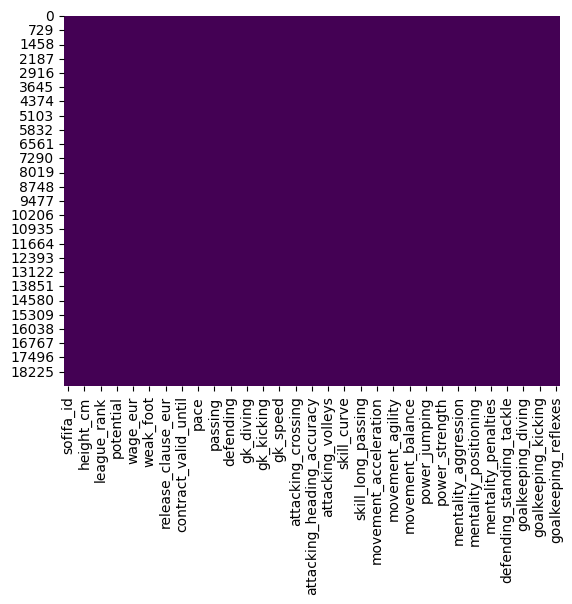

In [15]:
# Heatmap of missing values
sns.heatmap(imputed_col.isnull(), cbar=False, cmap='viridis')
plt.show()

yay!! that's how i like my heatmap

****well we can also use the K-NN(k-nearest Neighbours) for more sophisticated handling of data***

Scaling numerical data is a must step in preprocessing for training machine learning model as:
* Improves Algorithm Performance:Gradient-Based Algorithms: Algorithms like gradient descent can converge faster when the data is scaled.
* In high-dimensional datasets, numerical stability can be an issue. Scaling helps mitigate these issues by ensuring that values do not grow too large or too small during calculations.
* In linear models, scaling can help you interpret the weights correctly. Without scaling, the magnitude of the weights may be skewed by the scale of the features.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numeric_df2 = pd.DataFrame(scaler.fit_transform(imputed_col), columns=numerical_columns)
numeric_df2

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0.610136,0.459459,0.294118,0.366667,0.0,1.000000,0.958333,0.639810,1.000000,1.00,...,1.000000,0.802326,1.000000,0.340909,0.232558,0.056180,0.109890,0.152174,0.144444,0.078652
1,0.080176,0.513514,0.627451,0.550000,0.0,0.978261,0.937500,0.436019,0.392857,1.00,...,0.848837,0.906977,0.988095,0.306818,0.232558,0.067416,0.109890,0.152174,0.144444,0.112360
2,0.773757,0.297297,0.647059,0.616667,0.0,0.956522,0.958333,0.710900,0.223214,0.50,...,0.651163,0.058140,0.666667,0.079545,0.162791,0.966292,1.000000,0.836957,0.988889,1.000000
3,0.728014,0.405405,0.568627,0.500000,0.0,0.956522,0.916667,0.758294,0.428571,0.75,...,0.813953,0.953488,0.904762,0.420455,0.174419,0.157303,0.054945,0.119565,0.077778,0.101124
4,0.736997,0.324324,0.392157,0.300000,0.0,0.956522,0.916667,0.853081,0.482143,1.00,...,0.941860,1.000000,0.964286,0.284091,0.290698,0.089888,0.087912,0.152174,0.155556,0.112360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,0.991152,0.216216,0.411765,0.383333,0.0,0.000000,0.104167,0.000379,0.000893,0.00,...,0.465116,0.383721,0.285714,0.386364,0.581395,0.101124,0.087912,0.141304,0.055556,0.056180
18940,0.995134,0.135135,0.431373,0.333333,0.0,0.000000,0.104167,0.000332,0.001786,0.00,...,0.186047,0.337209,0.333333,0.579545,0.500000,0.123596,0.131868,0.076087,0.144444,0.056180
18941,0.969177,0.108108,0.588235,0.400000,0.0,0.000000,0.083333,0.000332,0.001786,0.00,...,0.186047,0.337209,0.333333,0.568182,0.476744,0.123596,0.087912,0.141304,0.155556,0.134831
18942,0.995084,0.189189,0.607843,0.500000,0.0,0.000000,0.083333,0.000379,0.001786,0.00,...,0.418605,0.418605,0.369048,0.500000,0.476744,0.157303,0.065934,0.065217,0.044444,0.134831


**now we'll handle categorical data**

In [17]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer_categorical = SimpleImputer(strategy='constant', fill_value='Unknown')

# Apply the imputer to the categorical data
df_categorical_imputed = pd.DataFrame(imputer_categorical.fit_transform(df_categorical), columns=categorical_columns)
df_categorical_imputed

,player_url,short_name,long_name,dob,nationality,club_name,league_name,player_positions,preferred_foot,work_rate,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,Argentina,FC Barcelona,Spain Primera Division,"RW, ST, CF",Left,Medium/Low,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,Portugal,Juventus,Italian Serie A,"ST, LW",Right,High/Low,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,1993-01-07,Slovenia,Atlético Madrid,Spain Primera Division,GK,Right,Medium/Medium,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,1988-08-21,Poland,FC Bayern München,German 1. Bundesliga,ST,Right,High/Medium,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,1992-02-05,Brazil,Paris Saint-Germain,French Ligue 1,"LW, CAM",Right,High/Medium,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,1996-04-13,Colombia,América de Cali,Colombian Liga Postobón,CM,Right,Medium/Medium,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,1999-04-26,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,CB,Right,Low/Low,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,2000-06-28,China PR,Tianjin TEDA FC,Chinese Super League,CB,Right,Low/Medium,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,1997-02-20,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,CM,Right,Low/Low,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


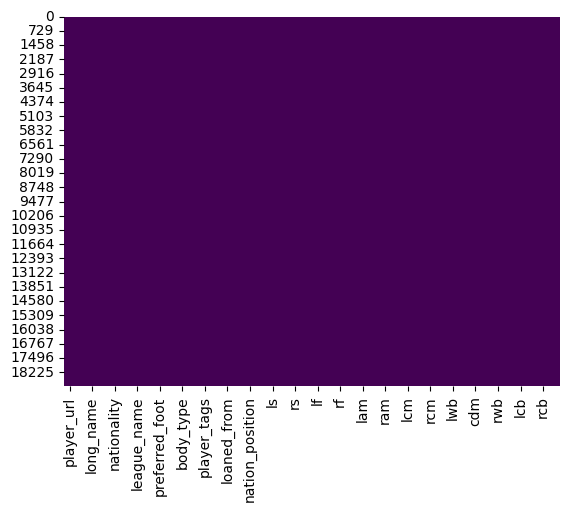

In [18]:
sns.heatmap(df_categorical_imputed.isnull(), cbar=False, cmap='viridis')
plt.show()

While training model... to use the categorical data.. we need to one-hot encode them.... i.e represent them in 1s and 0s


if categorial column just has two categories,then we can replace their value with 0 and 1

if more than 2 column, we can perform one-hot encoding i.e create a new column for each category with 1s and 0s

if the categories have a natural order(eg. cold neutral,warm,hot),then they can be convertd to numbers(eg.1,2,3,4)

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown='error')
encoder.fit(df_categorical_imputed)
encoded_cols = list(encoder.get_feature_names_out(categorical_columns))
encoded_df=pd.DataFrame(encoder.transform(df_categorical_imputed),columns=encoded_cols)
encoded_df

,player_url_https://sofifa.com/player/101317/michael-ratajczak/210002,player_url_https://sofifa.com/player/102064/claudio-terzi/210002,player_url_https://sofifa.com/player/102881/kyriakos-stamatopoulos/210002,player_url_https://sofifa.com/player/104389/rune-almenning-jarstein/210002,player_url_https://sofifa.com/player/104442/chris-burke/210002,player_url_https://sofifa.com/player/104476/christian-grindheim/210002,player_url_https://sofifa.com/player/104900/michael-gurski/210002,player_url_https://sofifa.com/player/105308/jean-francois-gillet/210002,player_url_https://sofifa.com/player/105846/artur-boruc/210002,player_url_https://sofifa.com/player/106795/gianluca-pegolo/210002,...,rb_80+3,rb_81+2,rb_81+3,rb_82+1,rb_82+2,rb_82+3,rb_83+0,rb_83+2,rb_83+3,rb_84+3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_final = pd.concat([numeric_df2, encoded_df], axis=1)
df_final

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,rb_80+3,rb_81+2,rb_81+3,rb_82+1,rb_82+2,rb_82+3,rb_83+0,rb_83+2,rb_83+3,rb_84+3
0,0.610136,0.459459,0.294118,0.366667,0.0,1.000000,0.958333,0.639810,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.080176,0.513514,0.627451,0.550000,0.0,0.978261,0.937500,0.436019,0.392857,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.773757,0.297297,0.647059,0.616667,0.0,0.956522,0.958333,0.710900,0.223214,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.728014,0.405405,0.568627,0.500000,0.0,0.956522,0.916667,0.758294,0.428571,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.736997,0.324324,0.392157,0.300000,0.0,0.956522,0.916667,0.853081,0.482143,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,0.991152,0.216216,0.411765,0.383333,0.0,0.000000,0.104167,0.000379,0.000893,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18940,0.995134,0.135135,0.431373,0.333333,0.0,0.000000,0.104167,0.000332,0.001786,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18941,0.969177,0.108108,0.588235,0.400000,0.0,0.000000,0.083333,0.000332,0.001786,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18942,0.995084,0.189189,0.607843,0.500000,0.0,0.000000,0.083333,0.000379,0.001786,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


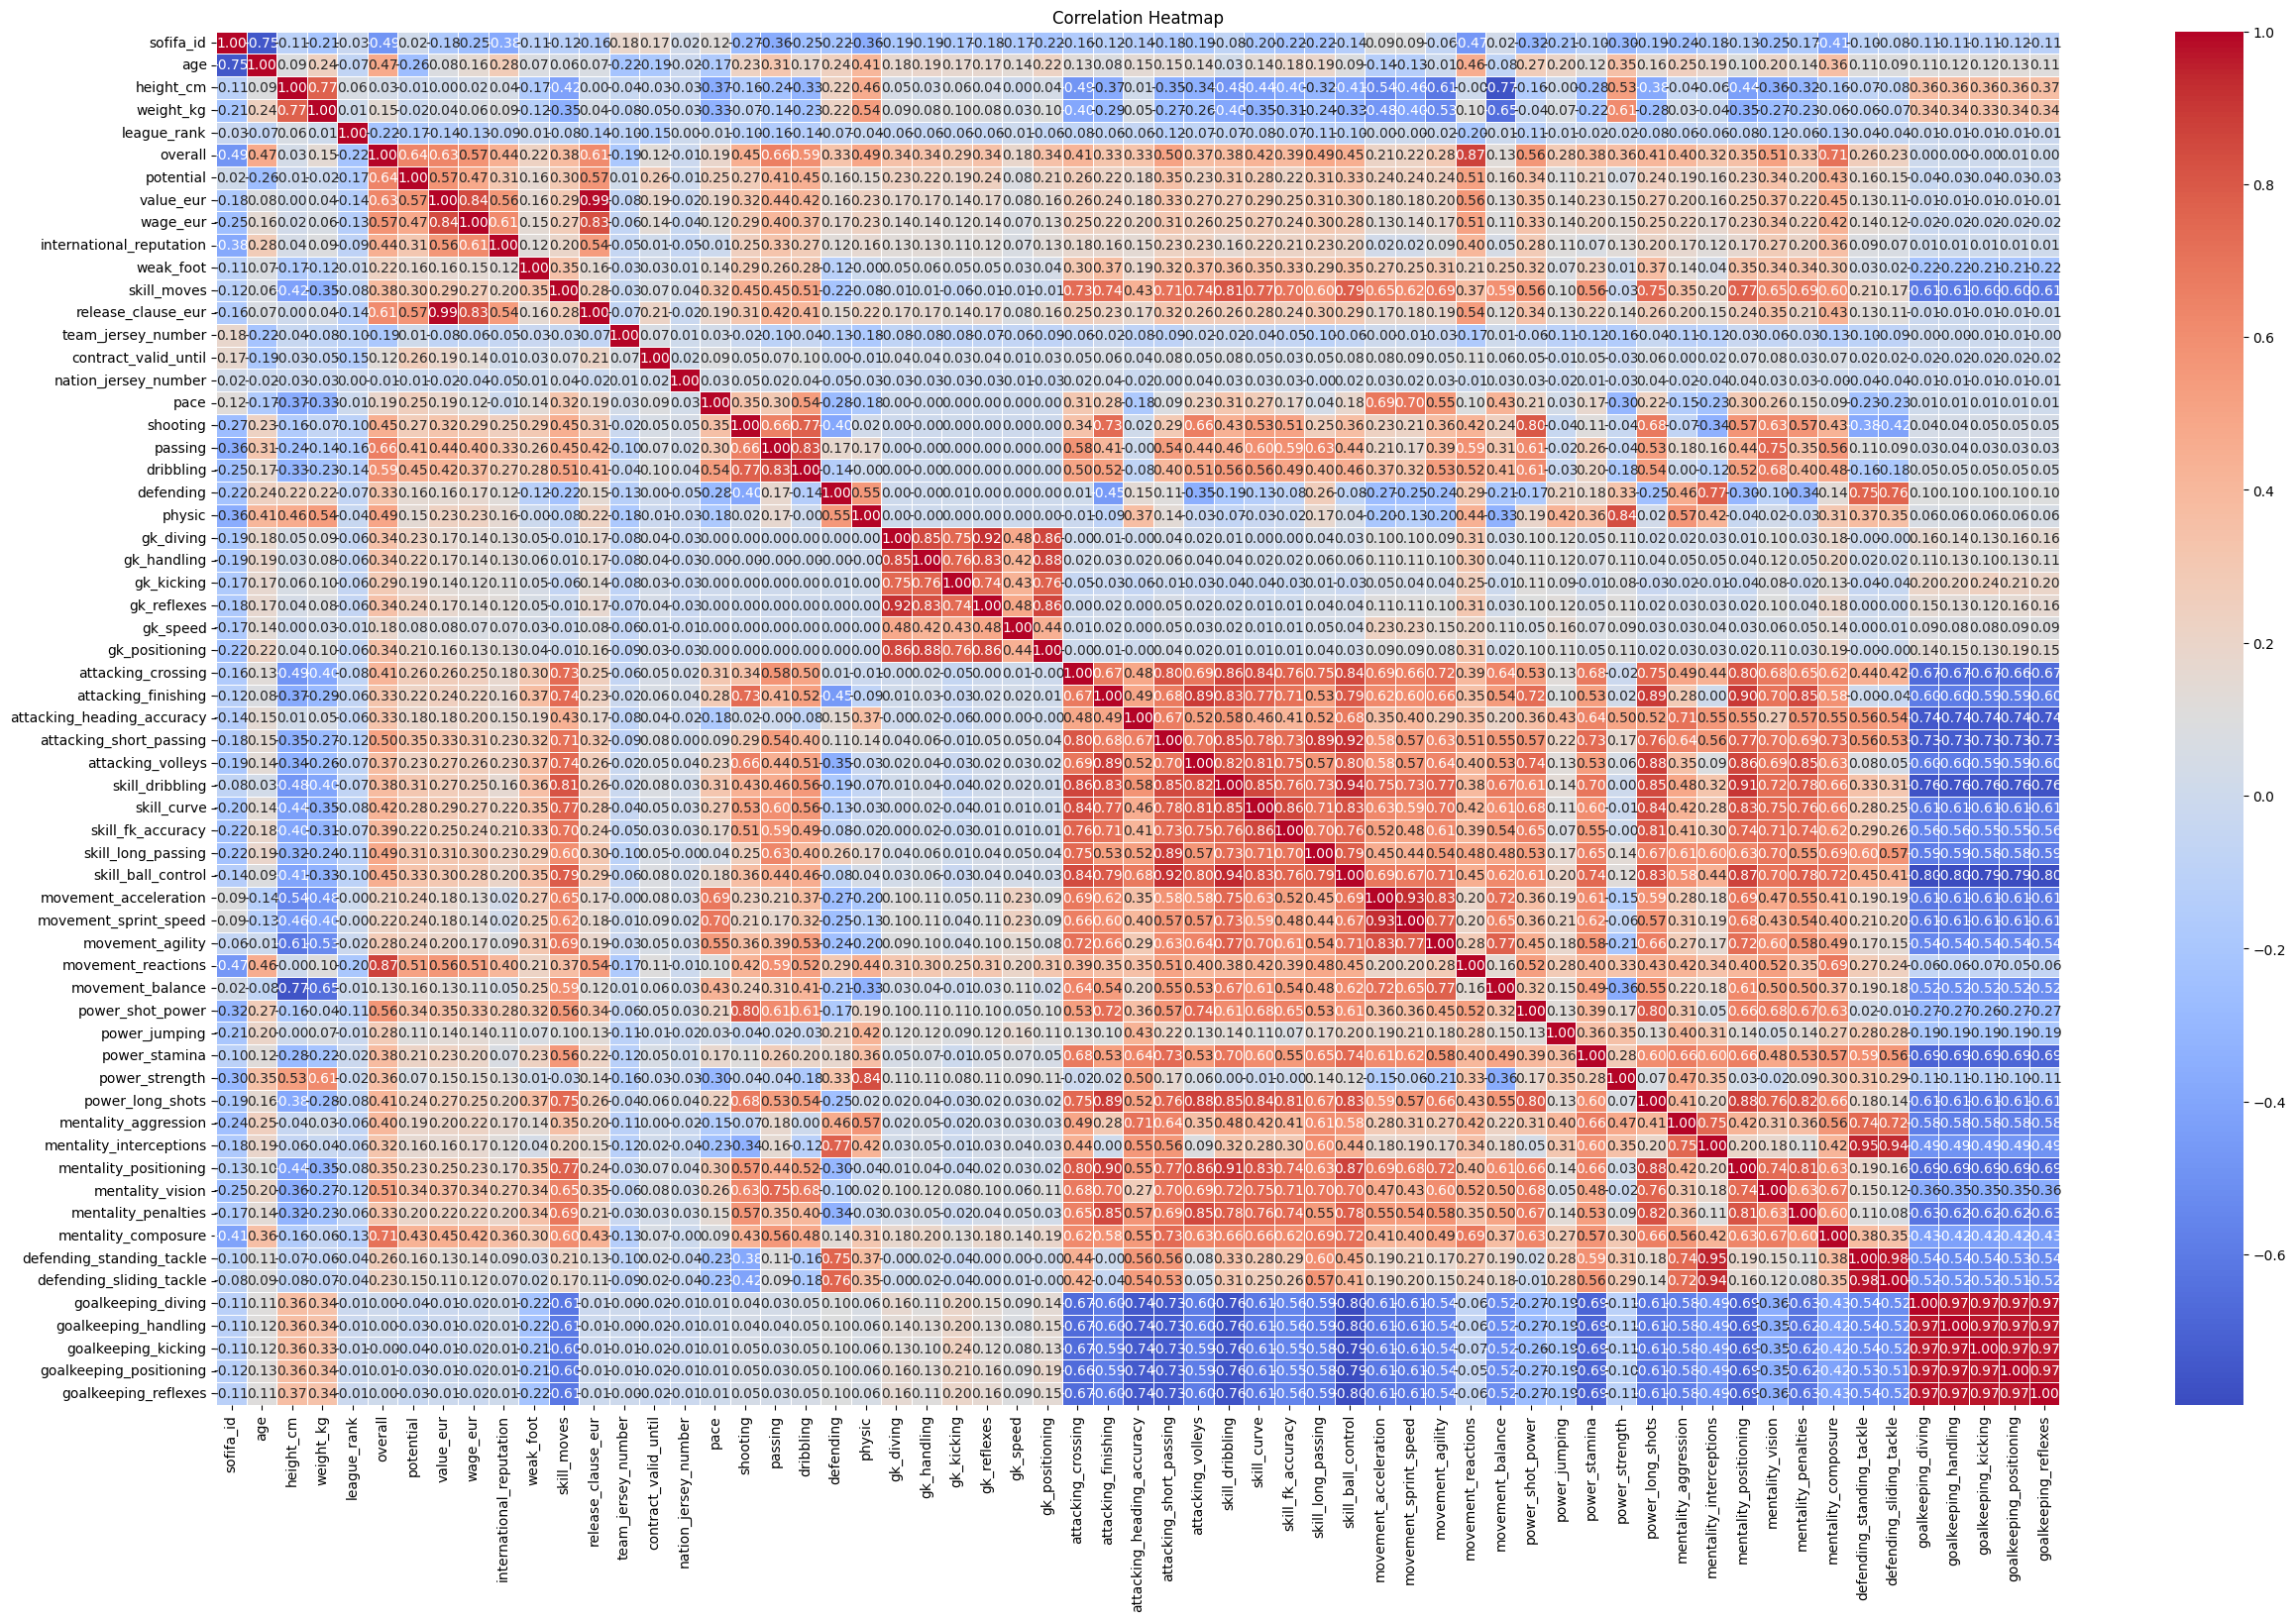

In [21]:
correlation_matrix = numeric_df2.corr()

# Plot the heatmap
plt.figure(figsize=(30, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

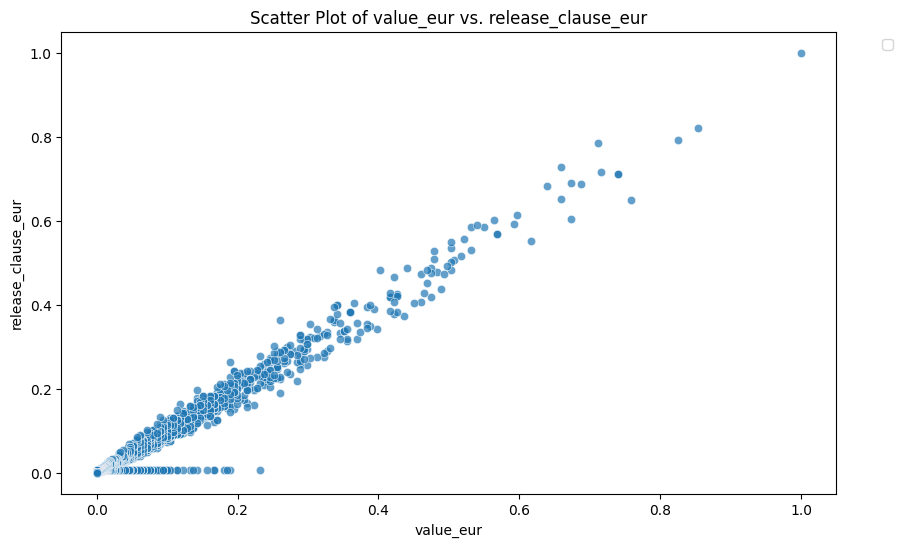

In [22]:
# Scatter plot of value_eur vs. release_clause_eur
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value_eur', y='release_clause_eur', data=numeric_df2, palette='Set1', alpha=0.7)
plt.title('Scatter Plot of value_eur vs. release_clause_eur')
plt.xlabel('value_eur')
plt.ylabel('release_clause_eur')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


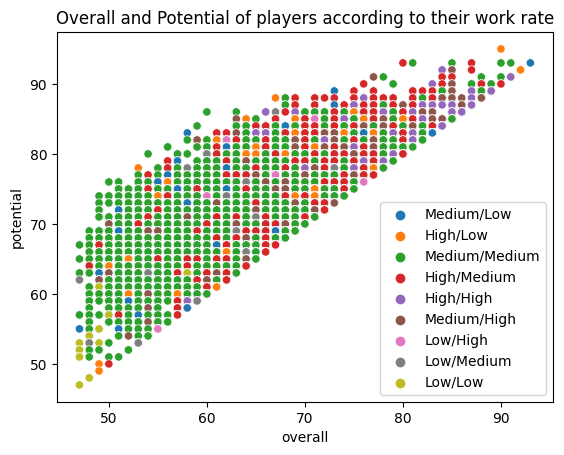

In [23]:
plt.title('Overall and Potential of players according to their work rate')
sns.scatterplot(x='overall', 
                y='potential', 
                hue='work_rate',
                data=fifa_df,);
plt.legend(fontsize='10')

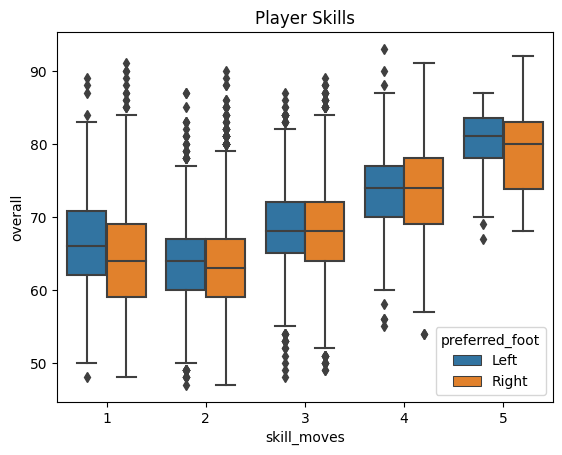

In [25]:
plt.title("Player Skills")
sns.boxplot(y='overall',x='skill_moves',hue='preferred_foot',data=fifa_df);

There are more right footed players but left footed players edge in skill moves.
Right footed with lower overall also show good skills

CLUBS IN TOP 100 ACCORDING TO LEAGUES

In [27]:
clubs_df = fifa_df.groupby('league_name').count()[['club_name']]
clubs_df

,club_name
league_name,
Argentina Primera División,659
Argentinian Primera B Nacional,30
Australian Hyundai A-League,250
Austrian Football Bundesliga,310
Belgian Jupiler Pro League,492
Campeonato Brasileiro Série A,360
Chilian Campeonato Nacional,174
Chinese Super League,436
Colombian Liga Postobón,195


TOP 10 BEST DRIBBLERS.....

In [29]:
dribblers_df = fifa_df.sort_values(by='dribbling',ascending=False).head(10)
dribblers_df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
22,211110,https://sofifa.com/player/211110/paulo-dybala/...,P. Dybala,Paulo Bruno Exequiel Dybala,26,1993-11-15,177,75,Argentina,Juventus,...,68+3,64+3,64+3,64+3,68+3,64+3,54+3,54+3,54+3,64+3
34,218667,https://sofifa.com/player/218667/bernardo-mota...,Bernardo Silva,Bernardo Mota Veiga de Carvalho e Silva,25,1994-08-10,173,64,Portugal,Manchester City,...,72+2,70+2,70+2,70+2,72+2,68+2,58+2,58+2,58+2,68+2
25,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,29,1991-01-07,175,74,Belgium,Real Madrid,...,65+3,62+3,62+3,62+3,65+3,59+3,49+3,49+3,49+3,59+3
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,21,1998-12-20,178,73,France,Paris Saint-Germain,...,67+3,63+3,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3
128,190483,https://sofifa.com/player/190483/douglas-costa...,Douglas Costa,Douglas Costa de Souza,29,1990-09-14,172,70,Brazil,Juventus,...,67+3,62+3,62+3,62+3,67+3,63+3,52+3,52+3,52+3,63+3
97,198219,https://sofifa.com/player/198219/lorenzo-insig...,L. Insigne,Lorenzo Insigne,29,1991-06-04,163,59,Italy,Napoli,...,63+3,57+3,57+3,57+3,63+3,58+3,44+3,44+3,44+3,58+3
28,233049,https://sofifa.com/player/233049/jadon-sancho/...,J. Sancho,Jadon Sancho,20,2000-03-25,180,76,England,Borussia Dortmund,...,66+3,62+3,62+3,62+3,66+3,61+3,49+3,49+3,49+3,61+3
92,189509,https://sofifa.com/player/189509/thiago-alcant...,Thiago,Thiago Alcântara do Nascimento,29,1991-04-11,174,70,Spain,Liverpool,...,77+3,79+3,79+3,79+3,77+3,75+3,70+3,70+3,70+3,75+3
